In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam, SGD

Using TensorFlow backend.


In [0]:
df = pd.read_csv('/content/drive/My Drive/Google Colab/Neural Network/Keras/My_Code_Keras/user_visit_duration.csv')
df.head()

,Time (min),Buy
0,2.000000,0
1,0.683333,0
2,3.216667,1
3,0.900000,0
4,1.533333,1


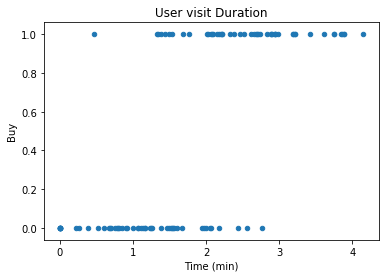

In [0]:
df.plot(kind='scatter',
        x = 'Time (min)',
        y = 'Buy',
        title='User visit Duration')

In [0]:
model = Sequential()
model.add(Dense(1, input_shape=(1,), activation='sigmoid'))

In [0]:
model.compile(SGD(lr=0.5), 'binary_crossentropy', metrics=['accuracy'])

In [0]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [0]:
x = df[['Time (min)']].values
y = df[['Buy']].values

model.fit(x, y, epochs=25)

Epoch 1/25
100/100 [==============================] - 0s 177us/step - loss: 0.3842 - acc: 0.8300
Epoch 2/25
100/100 [==============================] - 0s 333us/step - loss: 0.3816 - acc: 0.8200
Epoch 3/25
100/100 [==============================] - 0s 200us/step - loss: 0.3829 - acc: 0.8300
Epoch 4/25
100/100 [==============================] - 0s 214us/step - loss: 0.3847 - acc: 0.8300
Epoch 5/25
100/100 [==============================] - 0s 177us/step - loss: 0.3952 - acc: 0.8100
Epoch 6/25
100/100 [==============================] - 0s 178us/step - loss: 0.3798 - acc: 0.8300
Epoch 7/25
100/100 [==============================] - 0s 198us/step - loss: 0.3810 - acc: 0.8200
Epoch 8/25
100/100 [==============================] - 0s 226us/step - loss: 0.3857 - acc: 0.8200
Epoch 9/25
100/100 [==============================] - 0s 208us/step - loss: 0.3832 - acc: 0.8400
Epoch 10/25
100/100 [==============================] - 0s 205us/step - loss: 0.3824 - acc: 0.8300
Epoch 11/25
100/100 [========

In [0]:
y_pred = model.predict(x)
y_class_pred = y_pred>0.5 # we give a threshold
y_class_pred

array([[False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [

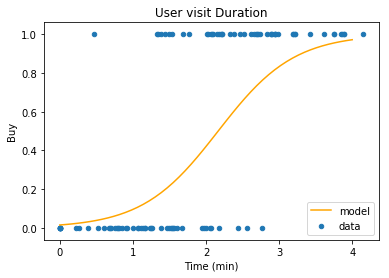

In [0]:
ax = df.plot(kind='scatter',
        x = 'Time (min)',
        y = 'Buy',
        title='User visit Duration')

temp = np.linspace(0,4)
ax.plot(temp, model.predict(temp), color='orange') # plot our predicted value in linespace
plt.legend(['model', 'data'])

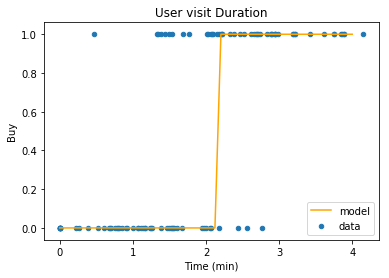

In [0]:
temp_class = model.predict(test) > 0.5
ax = df.plot(kind='scatter',
        x = 'Time (min)',
        y = 'Buy',
        title='User visit Duration')

temp = np.linspace(0,4)
ax.plot(temp, temp_class, color='orange') # plot our predicted value in linespace
plt.legend(['model', 'data'])

<h2> <center><font color="#0099cc"> Model Accuracy<br>

In [0]:
y_pred = model.predict(x)
y_class_pred = y_pred>0.5 # we give a threshold

In [0]:
from sklearn.metrics import accuracy_score

In [0]:
acc = accuracy_score(y, y_class_pred)
print("Accuracy of our model ", acc)

Accuracy of our model  0.81


<h2> <center><font color="#0099cc"> Model Performance<br>Train Test split

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [0]:
w_tmp = model.get_weights() # get the weight from model
w_tmp = [np.zeros(w.shape) for w in w_tmp]
model.set_weights(w_tmp)

In [0]:
acc = accuracy_score(y, model.predict(x)>0.5)
print("After resetting the model accuracy of our model : ", acc)

After resetting the model accuracy of our model :  0.82


In [0]:
model.fit(x_train, y_train, epochs=25, verbose=0)

In [0]:
acc_y_train = accuracy_score(y_train, model.predict(x_train) > 0.5)
acc_y_test = accuracy_score(y_test, model.predict(x_test) > 0.5)
print("Train accuracy score : ", acc_y_train)
print("Test accuracy score : ", acc_y_test)

Train accuracy score :  0.8375
Test accuracy score :  0.75


<h2> <center><font color="#0099cc"> Model Overfitting<br>Train Test split</center>
<h2> If Train score >> Test score ===> Overfitting !</h2><br>
<h3> Misstakes !!! </h3><br>
<h5><font color="green">
* Not preserving lebels ratio<br>
* Not randomly sampling the dataset<br>
* Test set too small<br>
* Train set too small<br>